# KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#df= pd.read_csv('https://raw.githubusercontent.com/angkasatech/ds/37146328bc5814f4e7a0adb739e6574def32b6dc/banking_train.csv', delimiter=';')

df= pd.read_csv('dataset/banking_train.csv', delimiter=';')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
#check for missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
df.duplicated().sum()

0

Dikarenakan tidak ada missing value dan duplicate data (secara keseluruhan) maka lanjut ke tahap selanjutnya.

In [6]:
#Outliers Handling
from scipy import stats
nums_skew = ['age','balance','duration','campaign','previous']

print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')
filtered_entries = np.array([True] * len(df))
for col in nums_skew:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3
print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 45211
Jumlah baris setelah memfilter outlier: 41794


In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,41794.000000,41794.000000,41794.000000,41794.000000,41794.000000,41794.000000,41794.000000
mean,40.584462,1073.558812,15.708020,235.482151,2.451644,38.701249,0.422573
std,10.065232,1713.348139,8.294276,190.272012,1.941483,99.008015,1.130555
min,18.000000,-6847.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,66.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,425.000000,16.000000,178.000000,2.000000,-1.000000,0.000000
75%,48.000000,1331.000000,21.000000,306.000000,3.000000,-1.000000,0.000000
max,72.000000,10483.000000,31.000000,1030.000000,12.000000,871.000000,7.000000


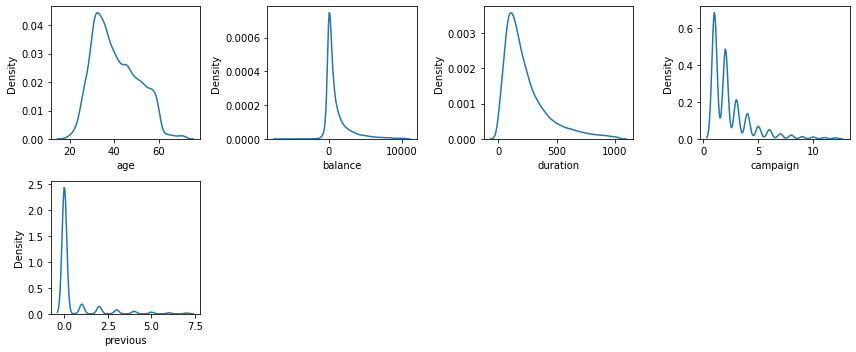

In [8]:
features = nums_skew
plt.figure(figsize=(12, 5))
for i in range(0, len(nums_skew)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=df[features[i]])
    plt.xlabel(features[i])
    plt.tight_layout()

mean > median : balance, duration, campaign, previous, pdays(namun pdays dipastikan tidak akan digunakan)

mean > median (mendekati/tidak terlalu jauh) : age

mean < median : day

In [9]:
#Feature Transformation

#tranformasi yang right skewed
df['log_campaign'] = np.log(df['campaign'])


# Karena gap antara mean & median lumayan jauh maka kita re-scale
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df['balance_norm'] = MinMaxScaler().fit_transform(df['balance'].values.reshape(len(df), 1))
df['duration_norm'] = MinMaxScaler().fit_transform(df['duration'].values.reshape(len(df), 1))
df['campaign_log_norm'] = MinMaxScaler().fit_transform(df['log_campaign'].values.reshape(len(df), 1))
df['previous_norm'] = MinMaxScaler().fit_transform(df['previous'].values.reshape(len(df), 1))
df['day_norm'] = MinMaxScaler().fit_transform(df['day'].values.reshape(len(df), 1))
df['age_norm'] = MinMaxScaler().fit_transform(df['age'].values.reshape(len(df), 1))

# drop kolom (nilai asli)
df = df.drop(columns=['balance','duration','campaign','previous','day','age','log_campaign'])

In [10]:
df.describe()

,pdays,balance_norm,duration_norm,campaign_log_norm,previous_norm,day_norm,age_norm
count,41794.000000,41794.000000,41794.000000,41794.000000,41794.000000,41794.000000,41794.000000
mean,38.701249,0.457043,0.228623,0.267205,0.060368,0.490267,0.418231
std,99.008015,0.098866,0.184730,0.261452,0.161508,0.276476,0.186393
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.000000,0.398904,0.100000,0.000000,0.000000,0.233333,0.277778
50%,-1.000000,0.419619,0.172816,0.278943,0.000000,0.500000,0.388889
75%,-1.000000,0.471898,0.297087,0.442114,0.000000,0.666667,0.555556
max,871.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


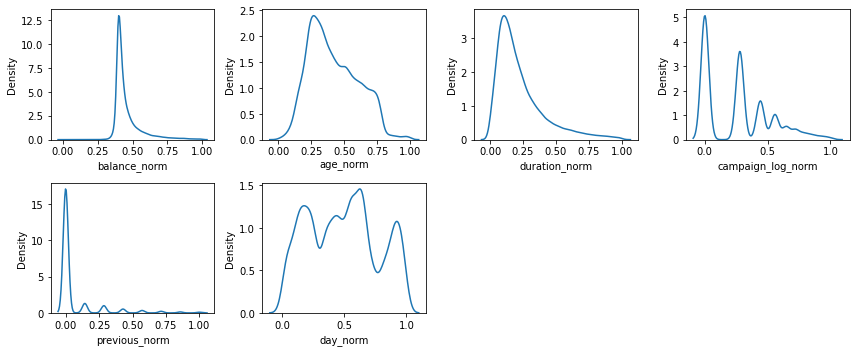

In [11]:
features = ['balance_norm','age_norm','duration_norm','campaign_log_norm','previous_norm', 'day_norm']
plt.figure(figsize=(12, 5))
for i in range(0, len(features)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=df[features[i]])
    plt.xlabel(features[i])
    plt.tight_layout()

In [12]:
#Feature encoding
df['converted'] = df['y'].apply(lambda x: 1 if 'yes' in x else 0)
df['loans'] = df['loan'].apply(lambda x: 1 if 'yes' in x else 0)
df['housings'] = df['housing'].apply(lambda x: 1 if 'yes' in x else 0)

for cat in ['contact']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [13]:
#Imbalance class handling
print(df['converted'].value_counts())

#shape feature & target
X = df[[col for col in df.columns if (str(df[col].dtype) != 'object') and col not in ['converted']]]
y = df['converted'].values
print(X.shape)
print(y.shape)

0    37501
1     4293
Name: converted, dtype: int64
(41794, 12)
(41794,)


In [14]:
#oversampling
from imblearn import under_sampling, over_sampling
X_over, y_over = over_sampling.RandomOverSampler(sampling_strategy=0.5, random_state=1).fit_resample(X, y)

print('Original')
print(pd.Series(y).value_counts())
print('Oversampling')
print(pd.Series(y_over).value_counts())

Original
0    37501
1     4293
dtype: int64
Oversampling
0    37501
1    18750
dtype: int64


## Feature option 1

In [15]:
X = df.drop(columns=['job', 'marital', 'education', 'default', 'month', 'pdays', 'poutcome',
                    'y', 'loan', 'housing', 'contact','converted'])

y = df[['converted']] # variable target

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
X.sample(5)

,balance_norm,duration_norm,campaign_log_norm,previous_norm,day_norm,age_norm,loans,housings,contact_cellular,contact_telephone,contact_unknown
17214,0.535199,0.059223,0.442114,0.0,0.900000,0.629630,0,1,1,0,0
33653,0.468090,0.242718,0.278943,0.0,0.633333,0.537037,1,1,1,0,0
18969,0.439527,0.146602,0.000000,0.0,0.100000,0.666667,0,0,1,0,0
9879,0.444778,0.113592,0.000000,0.0,0.266667,0.592593,0,0,0,0,1
37887,0.746451,0.598058,0.278943,0.0,0.433333,0.351852,0,1,1,0,0


In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41794 entries, 0 to 45209
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   balance_norm       41794 non-null  float64
 1   duration_norm      41794 non-null  float64
 2   campaign_log_norm  41794 non-null  float64
 3   previous_norm      41794 non-null  float64
 4   day_norm           41794 non-null  float64
 5   age_norm           41794 non-null  float64
 6   loans              41794 non-null  int64  
 7   housings           41794 non-null  int64  
 8   contact_cellular   41794 non-null  uint8  
 9   contact_telephone  41794 non-null  uint8  
 10  contact_unknown    41794 non-null  uint8  
dtypes: float64(6), int64(2), uint8(3)
memory usage: 4.0 MB


In [18]:
print(df.shape)
print(X_train.shape)
print(X_test.shape)

(41794, 23)
(29255, 11)
(12539, 11)


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
#     print("AUC (test-label): %.2f" % roc_auc_score(y_test, y_pred))
#     print("AUC (train-label): %.2f" % roc_auc_score(y_train, y_pred_train))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [20]:
df.converted.value_counts(normalize=True)

0    0.897282
1    0.102718
Name: converted, dtype: float64

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=120)
#knn.fit(X_train, y_train) #warning
knn.fit(X_train, np.ravel(y_train))
eval_classification(knn)

Accuracy (Test Set): 0.90
Precision (Test Set): 0.69
Recall (Test Set): 0.06
F1-Score (Test Set): 0.11
AUC (test-proba): 0.87
AUC (train-proba): 0.88


In [22]:
train_score = []
test_score = []

values = [int(x) for x in np.linspace(1, 150, num=30)]

from sklearn.neighbors import KNeighborsClassifier
for x in values:
    model = KNeighborsClassifier(n_neighbors=x)
    model.fit(X_train, np.ravel(y_train))
    
    # eval test
    y_pred_proba = model.predict_proba(X_test)
    auc_test = roc_auc_score(y_test, y_pred_proba[:,1])
    test_score.append(auc_test)
    
    # eval train
    y_pred_proba_train = model.predict_proba(X_train)
    auc_train = roc_auc_score(y_train, y_pred_proba_train[:,1])
    train_score.append(auc_train)
    
    print('k: '+ str(x) + '; auc(train): '+ str(auc_train) + '; auc(test): ' + str(auc_test))

k: 1; auc(train): 1.0; auc(test): 0.648681056847137
k: 6; auc(train): 0.9401466263244894; auc(test): 0.8035113426679692
k: 11; auc(train): 0.9239879807337666; auc(test): 0.8328839172585445
k: 16; auc(train): 0.9156706587632946; auc(test): 0.8446395294853484
k: 21; auc(train): 0.9108025544629015; auc(test): 0.854508648723876
k: 26; auc(train): 0.9067466133674408; auc(test): 0.8607530872755136
k: 31; auc(train): 0.903009171922717; auc(test): 0.8657981202304535
k: 36; auc(train): 0.9007697898071645; auc(test): 0.866848548864981
k: 42; auc(train): 0.8987256229486009; auc(test): 0.8683930597960481
k: 47; auc(train): 0.8969543238376982; auc(test): 0.8704247012132017
k: 52; auc(train): 0.8955033011609387; auc(test): 0.8710427742546316
k: 57; auc(train): 0.8942708934013344; auc(test): 0.8705977240511418
k: 62; auc(train): 0.8928842197900316; auc(test): 0.8706464874751885
k: 67; auc(train): 0.8920067389481827; auc(test): 0.870815379527207
k: 72; auc(train): 0.8908340105850108; auc(test): 0.8711

### Option 1 Result

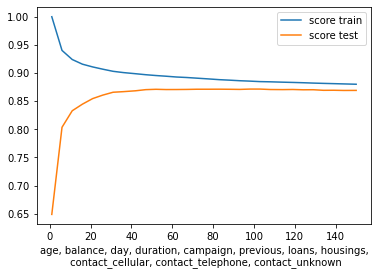

In [23]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlabel('age, balance, day, duration, campaign, previous, loans, housings,\n contact_cellular, contact_telephone, contact_unknown')

plt.plot(values, train_score, label='score train')
plt.plot(values, test_score, label='score test')
plt.legend()
plt.show()

## Feature option 2

In [24]:
X = df.drop(columns=['job', 'marital', 'education', 'default', 'month', 'pdays', 'poutcome',
                    'y', 'loan', 'housing', 'contact','converted','day_norm', 'contact_telephone', 
                    'contact_cellular','contact_unknown'])

y = df[['converted']] # variable target

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
X.sample(5)

,balance_norm,duration_norm,campaign_log_norm,previous_norm,age_norm,loans,housings
10160,0.434103,0.154369,0.000000,0.000000,0.592593,0,0
30569,0.407271,0.051456,0.278943,0.000000,0.388889,0,0
40942,0.421119,0.280583,0.278943,0.000000,0.462963,0,0
4659,0.447490,0.062136,0.000000,0.000000,0.259259,0,1
35475,0.426601,0.424272,0.442114,0.285714,0.370370,0,1


In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=120)
#knn.fit(X_train, y_train) #warning
knn.fit(X_train, np.ravel(y_train))
eval_classification(knn)

Accuracy (Test Set): 0.90
Precision (Test Set): 0.65
Recall (Test Set): 0.08
F1-Score (Test Set): 0.14
AUC (test-proba): 0.87
AUC (train-proba): 0.87


In [27]:
train_score = []
test_score = []

values = [int(x) for x in np.linspace(1, 150, num=30)]

from sklearn.neighbors import KNeighborsClassifier
for x in values:
    model = KNeighborsClassifier(n_neighbors=x)
    model.fit(X_train, np.ravel(y_train))
    
    # eval test
    y_pred_proba = model.predict_proba(X_test)
    auc_test = roc_auc_score(y_test, y_pred_proba[:,1])
    test_score.append(auc_test)
    
    # eval train
    y_pred_proba_train = model.predict_proba(X_train)
    auc_train = roc_auc_score(y_train, y_pred_proba_train[:,1])
    train_score.append(auc_train)
    
    print('k: '+ str(x) + '; auc(train): '+ str(auc_train) + '; auc(test): ' + str(auc_test))

k: 1; auc(train): 0.9999809813617345; auc(test): 0.6313058630024513
k: 6; auc(train): 0.9336612706759537; auc(test): 0.7908532712600469
k: 11; auc(train): 0.9130921611779882; auc(test): 0.8292580947283918
k: 16; auc(train): 0.9033285182716837; auc(test): 0.8410695229405716
k: 21; auc(train): 0.8975635809433886; auc(test): 0.849009195733966
k: 26; auc(train): 0.8943919071043754; auc(test): 0.8534553654811916
k: 31; auc(train): 0.8908677181546854; auc(test): 0.8553540157418542
k: 36; auc(train): 0.8883264945346271; auc(test): 0.858877811218113
k: 42; auc(train): 0.8859402744200278; auc(test): 0.8600447078654462
k: 47; auc(train): 0.8843736838492955; auc(test): 0.8616351611960285
k: 52; auc(train): 0.883380603041571; auc(test): 0.861089729536288
k: 57; auc(train): 0.8821728970613799; auc(test): 0.8617906197978964
k: 62; auc(train): 0.881492709735811; auc(test): 0.8625242876778723
k: 67; auc(train): 0.8809674617718957; auc(test): 0.8632319618318067
k: 72; auc(train): 0.8799787427429302; au

### Option 2 Result

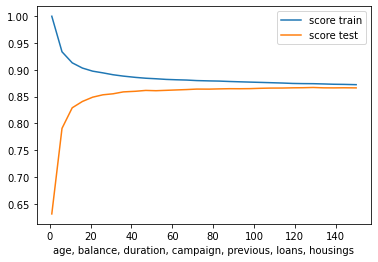

In [28]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlabel('age, balance, duration, campaign, previous, loans, housings')

plt.plot(values, train_score, label='score train')
plt.plot(values, test_score, label='score test')
plt.legend()
plt.show()

## Feature option 3

In [29]:
X = df.drop(columns=['job', 'marital', 'education', 'default', 'month', 'pdays', 'poutcome',
                    'y', 'loan', 'housing', 'contact','converted', 'contact_telephone', 
                    'contact_cellular','contact_unknown'])

y = df[['converted']] # variable target

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X.sample(5)

,balance_norm,duration_norm,campaign_log_norm,previous_norm,day_norm,age_norm,loans,housings
16585,0.385632,0.113592,0.557886,0.0,0.766667,0.111111,1,1
6864,0.483728,0.336893,0.278943,0.0,0.900000,0.185185,0,1
23810,0.424812,0.110680,0.442114,0.0,0.933333,0.314815,1,1
3713,0.443104,0.221359,0.278943,0.0,0.500000,0.203704,0,1
7290,0.351125,0.160194,0.000000,0.0,0.933333,0.370370,0,0


In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=120)
#knn.fit(X_train, y_train) #warning
knn.fit(X_train, np.ravel(y_train))
eval_classification(knn)

Accuracy (Test Set): 0.90
Precision (Test Set): 0.71
Recall (Test Set): 0.05
F1-Score (Test Set): 0.09
AUC (test-proba): 0.86
AUC (train-proba): 0.88


In [31]:
train_score = []
test_score = []

values = [int(x) for x in np.linspace(1, 150, num=30)]

from sklearn.neighbors import KNeighborsClassifier
for x in values:
    model = KNeighborsClassifier(n_neighbors=x)
    model.fit(X_train, np.ravel(y_train))
    
    # eval test
    y_pred_proba = model.predict_proba(X_test)
    auc_test = roc_auc_score(y_test, y_pred_proba[:,1])
    test_score.append(auc_test)
    
    # eval train
    y_pred_proba_train = model.predict_proba(X_train)
    auc_train = roc_auc_score(y_train, y_pred_proba_train[:,1])
    train_score.append(auc_train)
    
    print('k: '+ str(x) + '; auc(train): '+ str(auc_train) + '; auc(test): ' + str(auc_test))

k: 1; auc(train): 1.0; auc(test): 0.6387477593005149
k: 6; auc(train): 0.9367252534802826; auc(test): 0.7980850012305041
k: 11; auc(train): 0.9182613115997016; auc(test): 0.8250117139685313
k: 16; auc(train): 0.9096253232045988; auc(test): 0.8353758894287344
k: 21; auc(train): 0.9036086663412437; auc(test): 0.8424754006660842
k: 26; auc(train): 0.898977137223484; auc(test): 0.8474351647961931
k: 31; auc(train): 0.8961229431487039; auc(test): 0.8525044787122802
k: 36; auc(train): 0.8937380187389713; auc(test): 0.8560859372733105
k: 42; auc(train): 0.8912025231607245; auc(test): 0.8593294438121767
k: 47; auc(train): 0.8897381906443693; auc(test): 0.859989832221581
k: 52; auc(train): 0.8882266162154256; auc(test): 0.8633856740851551
k: 57; auc(train): 0.8860637063445279; auc(test): 0.863384498658267
k: 62; auc(train): 0.8846625298188514; auc(test): 0.863201400732714
k: 67; auc(train): 0.8835582877965769; auc(test): 0.8629877752916939
k: 72; auc(train): 0.8824900240346838; auc(test): 0.862

### Option 3 Result

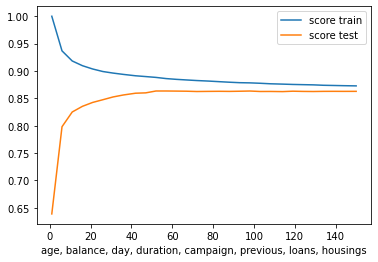

In [32]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlabel('age, balance, day, duration, campaign, previous, loans, housings')

plt.plot(values, train_score, label='score train')
plt.plot(values, test_score, label='score test')
plt.legend()
plt.show()

## Feature option 4

In [41]:
X = df.drop(columns=['job', 'marital', 'education', 'default', 'month', 'pdays', 'poutcome',
                    'y', 'loan', 'housing', 'contact','converted', 'contact_telephone', 
                    'contact_cellular','contact_unknown','age_norm','day_norm','balance_norm','housings'])

y = df[['converted']] # variable target

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X.sample(5)

,duration_norm,campaign_log_norm,previous_norm,loans
4469,0.257282,0.000000,0.0,0
11813,0.163107,0.278943,0.0,0
11424,0.086408,0.278943,0.0,0
18194,0.232039,0.557886,0.0,0
13031,0.332039,0.000000,0.0,1


In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=120)
#knn.fit(X_train, y_train) #warning
knn.fit(X_train, np.ravel(y_train))
eval_classification(knn)

Accuracy (Test Set): 0.90
Precision (Test Set): 0.60
Recall (Test Set): 0.06
F1-Score (Test Set): 0.11
AUC (test-proba): 0.83
AUC (train-proba): 0.84


In [43]:
train_score = []
test_score = []

values = [int(x) for x in np.linspace(1, 150, num=30)]

from sklearn.neighbors import KNeighborsClassifier
for x in values:
    model = KNeighborsClassifier(n_neighbors=x)
    model.fit(X_train, np.ravel(y_train))
    
    # eval test
    y_pred_proba = model.predict_proba(X_test)
    auc_test = roc_auc_score(y_test, y_pred_proba[:,1])
    test_score.append(auc_test)
    
    # eval train
    y_pred_proba_train = model.predict_proba(X_train)
    auc_train = roc_auc_score(y_train, y_pred_proba_train[:,1])
    train_score.append(auc_train)
    
    print('k: '+ str(x) + '; auc(train): '+ str(auc_train) + '; auc(test): ' + str(auc_test))

k: 1; auc(train): 0.7949615361671639; auc(test): 0.6052264315490488
k: 6; auc(train): 0.8768431626231481; auc(test): 0.7516170851455058
k: 11; auc(train): 0.8771286923579712; auc(test): 0.786895911180177
k: 16; auc(train): 0.8739561269200647; auc(test): 0.8015359202396957
k: 21; auc(train): 0.869921507225479; auc(test): 0.8078813111692152
k: 26; auc(train): 0.8665781204197314; auc(test): 0.8144808965592099
k: 31; auc(train): 0.8631172606489942; auc(test): 0.8200567858804767
k: 36; auc(train): 0.860658198829119; auc(test): 0.821068056007815
k: 42; auc(train): 0.857423670475312; auc(test): 0.8225880508923572
k: 47; auc(train): 0.8552662448997657; auc(test): 0.8247526834660021
k: 52; auc(train): 0.8535877298032003; auc(test): 0.8246134457551909
k: 57; auc(train): 0.8518031016095605; auc(test): 0.8258084854805897
k: 62; auc(train): 0.8503364855737374; auc(test): 0.8267569542284741
k: 67; auc(train): 0.8487022168740542; auc(test): 0.8275920782407123
k: 72; auc(train): 0.8475229843290268; au

### Option 4 Result

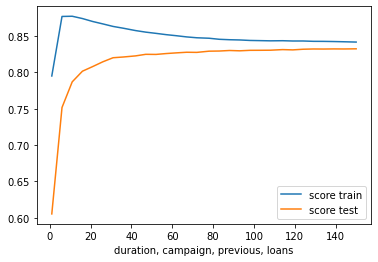

In [44]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlabel('duration, campaign, previous, loans')

plt.plot(values, train_score, label='score train')
plt.plot(values, test_score, label='score test')
plt.legend()
plt.show()

## Feature Importance (random forest)

In [45]:
X = df.drop(columns=['job', 'marital', 'education', 'default', 'month', 'pdays', 'poutcome',
                    'y', 'loan', 'housing', 'contact','converted','day_norm', 'contact_telephone', 
                    'contact_cellular','contact_unknown'])
y = df[['converted']] # variable target

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X.sample(5)

,balance_norm,duration_norm,campaign_log_norm,previous_norm,age_norm,loans,housings
5760,0.400692,0.367961,0.000000,0.000000,0.388889,1,1
34079,0.507444,0.428155,0.278943,0.000000,0.703704,0,0
1660,0.398384,0.020388,0.000000,0.000000,0.370370,0,1
24055,0.467686,0.302913,0.000000,0.000000,0.462963,0,0
35125,0.403635,0.225243,0.278943,0.571429,0.240741,1,1


In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, np.ravel(y_train))
eval_classification(rf)

Accuracy (Test Set): 0.90
Precision (Test Set): 0.56
Recall (Test Set): 0.26
F1-Score (Test Set): 0.35
AUC (test-proba): 0.86
AUC (train-proba): 1.00


In [47]:
from sklearn.model_selection import RandomizedSearchCV

hyperparams = dict(
                    n_estimators = [int(x) for x in np.linspace(10, 1000, num=50)],
                    criterion = ['gini', 'entropy'],
                    max_depth = [int(x) for x in np.linspace(1, 1000, num=50)],
                    min_samples_split = [int(x) for x in np.linspace(2, 40, num=40)],
                    min_samples_leaf = [int(x) for x in np.linspace(2, 20, num=20)],
                    max_features = ['auto', 'sqrt', 'log2']
                    )

rf = RandomForestClassifier()
rs = RandomizedSearchCV(rf, hyperparams, cv=5, random_state=42, scoring='roc_auc')
rs.fit(X_train, np.ravel(y_train))
eval_classification(rs)

Accuracy (Test Set): 0.90
Precision (Test Set): 0.62
Recall (Test Set): 0.18
F1-Score (Test Set): 0.28
AUC (test-proba): 0.88
AUC (train-proba): 0.92


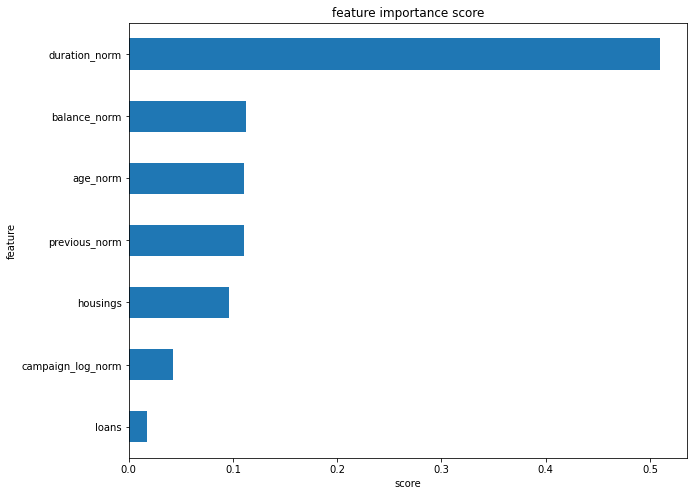

In [48]:
show_feature_importance(rs.best_estimator_)

In [49]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

max_features = ['auto', 'sqrt', 'log2'] 
criterion = ['gini', 'entropy']
hyperparameters = dict(max_features=max_features, criterion=criterion)

rf = RandomForestClassifier(random_state=42)
clf = GridSearchCV(rf, hyperparameters, cv=5, scoring='roc_auc')
clf.fit(X_train, np.ravel(y_train))

eval_classification(clf)

Accuracy (Test Set): 0.90
Precision (Test Set): 0.55
Recall (Test Set): 0.25
F1-Score (Test Set): 0.35
AUC (test-proba): 0.86
AUC (train-proba): 1.00


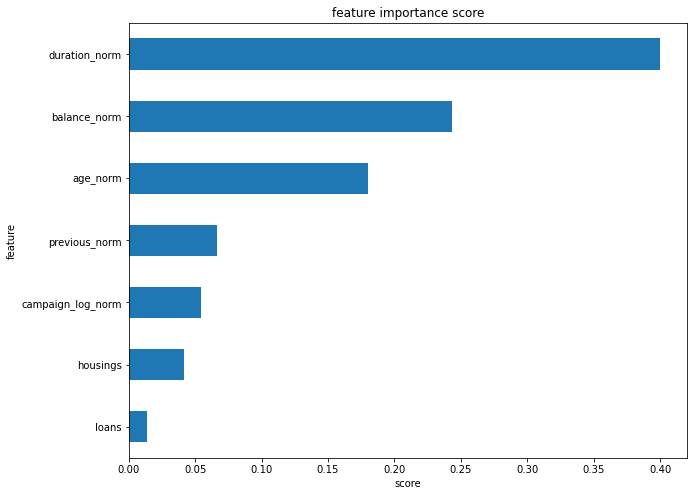

In [50]:
show_feature_importance(clf.best_estimator_)